# Can two-dimensional topological voids exist in two dimensions?

The classic example of a two-dimensional homology class is the "void" surrounded by a sphere in three-dimensional space.
Challenge question: **Can two-dimensional topological voids arise from point clouds in two-dimensional space?**
We will answer this question programmatically by computing Vietoris–Rips persistent homology of random point clouds in the square $[0, 1] \times [0, 1] \subset \mathbb{R}^2$.

If you are looking at a static version of this notebook and would like to run its contents, head over to [github](https://github.com/giotto-ai/giotto-tda/blob/master/examples/voids_on_the_plane.ipynb).

**License: AGPLv3**

## Import libraries

In [1]:
import numpy as np
from gtda.homology import VietorisRipsPersistence
import itertools

import matplotlib.pyplot as plt  # Not a requirement of giotto-tda, but is needed here

np.random.seed(1)  # Set numpy's random seed

In [2]:
# Initialize the Vietoris–Rips transformer
VR = VietorisRipsPersistence(homology_dimensions=(2,), max_edge_length=np.inf)

In [3]:
# Create n_samples point clouds of n_points points
n_samples = 15000
n_points = 6
point_clouds = np.random.random((n_samples, n_points, 2))

# Compute persistence diagrams of all point clouds
diags = VR.fit_transform(point_clouds)  

In [4]:
diffs = np.nan_to_num(diags[:, :, 1] - diags[:, :, 0])  # Compute lifetimes
indices = np.argwhere(diffs != 0)  # Indices with non-zero lifetime
print(f'There are {len(indices[:, 0])} persistent homology classes in dimension 2 across all samples.')
print(f'There are {len(np.unique(indices[:, 0]))} different point clouds with at least one persistent homology class in dimension 2.')

There are 2 persistent homology classes in dimension 2 across all samples.
There are 2 different point clouds with at least one persistent homology class in dimension 2.


We can now plot the edges which exist when these persistent homology classes are born.
What do the clique complexes of the resulting graphs remind you of?

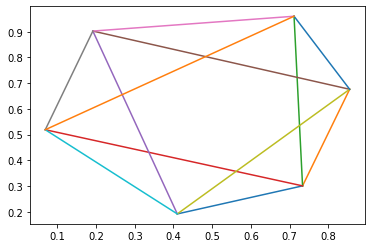

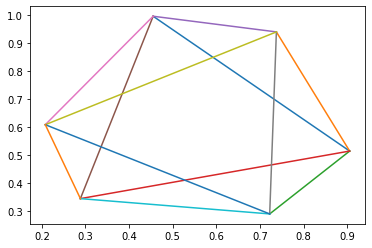

In [5]:
for i in indices[:, 0]:
    for e in itertools.combinations(point_clouds[i], 2):
        if np.linalg.norm(e[0] - e[1]) < diags[i, 0, 1] - 0.00001:
            edge = np.stack([e[0], e[1]])
            plt.plot(edge[:, 0], edge[:, 1])
    plt.show()